# Midterm Exam - MLC Fall 2024

Total points for the midterm exam: 15. More detailed instructions are in the PDF file in Brightspace.

Please note: Copying and pasting other people's work is absolutely prohibited. Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

## Part A - Ensemble Methods (30% + 10% with optional extra)

### Task 1: Create and Visualize Decision Trees (extra 10%)

##### This task 1 (decision trees) is optional, and you can get an extra 10% if you decide to do this task.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

The provided **Telecom dataset** encompasses diverse parameters associated with telecom customers and aims to predict whether a customer is likely to stay (Contract Closure = 0) or leave (Contract Closure = 1) the telecom service provider. Each row represents a customer, and the columns include various features such state, total miutes of usage internet service, and more. The target variable, "Contract Closure," serves as the binary indicator for customer churn prediction, with 0 indicating the customer stays and 1 indicating the customer leaves the telecom service.

In [2]:
# Load the dataset

data = pd.read_csv("telecom_dataset.csv")
data=data.dropna()

In [3]:
# Split the dataset into features and target variable ("Contract Closure")
X = data.iloc[:,:-1]
X=pd.get_dummies(X)
Y = data.iloc[:,-1]

In [4]:
X.head()

,State_FIPS,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,1,118,510,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
1,1,98,408,0,161.0,117,27.37,190.9,113,16.23,227.7,113,10.25,12.1,4,3.27,4
2,1,91,510,0,129.9,112,22.08,173.3,83,14.73,247.2,130,11.12,11.2,3,3.02,3
3,1,106,415,0,223.0,121,37.91,110.1,98,9.36,188.7,107,8.49,7.1,12,1.92,0
4,1,73,415,0,192.2,86,32.67,168.6,116,14.33,139.8,87,6.29,9.4,6,2.54,1


In [5]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Contract Closure, dtype: int64

In [6]:
# Split data into 80% train, 20% test, random_state=999
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=999)

# Print head
# if use print(), it will be hard to read, so I directly use head() to visulize the data
X_train.head()

,State_FIPS,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
1193,27,173,510,0,291.8,143,49.61,214.3,134,18.22,151.2,119,6.80,9.9,2,2.67,0
2512,56,57,408,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0
2383,51,138,415,0,251.0,119,42.67,91.2,96,7.75,142.2,87,6.40,13.8,3,3.73,3
1743,38,82,415,29,163.8,77,27.85,134.9,112,11.47,79.3,95,3.57,8.8,2,2.38,2
1396,32,130,510,0,154.2,119,26.21,110.2,98,9.37,227.4,117,10.23,9.2,5,2.48,2


In [7]:
X_test.head()

,State_FIPS,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
618,16,114,408,19,154.6,100,26.28,241.6,109,20.54,160.0,112,7.20,12.6,1,3.40,3
1327,30,80,408,15,159.3,110,27.08,170.6,120,14.50,141.2,82,6.35,11.9,5,3.21,1
2104,46,103,510,0,206.5,125,35.11,180.2,113,15.32,220.6,95,9.93,12.2,4,3.29,3
2274,49,133,408,44,174.0,80,29.58,209.4,113,17.80,224.1,87,10.08,14.1,7,3.81,2
2483,55,63,510,34,152.2,119,25.87,227.1,91,19.30,195.7,103,8.81,12.3,5,3.32,1


In [8]:
Y_train.head()

1193    1
2512    0
2383    0
1743    0
1396    0
Name: Contract Closure, dtype: int64

In [9]:
Y_test.head()

618     0
1327    0
2104    0
2274    1
2483    0
Name: Contract Closure, dtype: int64

#### a. Evaluate the model. Report on in-sample (training data) and out-of-sample (test data).

In [10]:
# Build the decision tree model with max_depth = 2:

# your code here
dt=DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train,Y_train)

# in sample accuracy
print('In sample accuracy:',dt.score(X_train,Y_train))

# out of sample accuracy
print('Out of sample accuracy:',dt.score(X_test,Y_test))


In sample accuracy: 0.8792434529582929
Out of sample accuracy: 0.8662790697674418


In [11]:
# Make predictions on the test set
pred=dt.predict(X_test)
pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

#### b. Visualize the decision tree.

In [12]:
# Visualize the decision tree
from sklearn import tree

print(tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=['Stay','Leave'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\","))

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Total day minutes <= 264.55, samples = 2062, value = [1757, 305], class = Stay", fillcolor="#ea975b"] ;
1 [label="Customer service calls <= 3.5, samples = 1941, value = [1710, 231], class = Stay", fillcolor="#e99254"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 1790, value = [1637, 153], class = Stay", fillcolor="#e78d4c"] ;
1 -> 2 ;
3 [label="samples = 151, value = [73, 78], class = Leave", fillcolor="#f2f9fd"] ;
1 -> 3 ;
4 [label="Number vmail messages <= 6.5, samples = 121, value = [47, 74], class = Leave", fillcolor="#b7dbf6"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="samples = 91, value = [20, 71], class = Leave", fillcolor="#71b9ec"] ;
4 -> 5 ;
6 [label="samples = 30, value = [27, 3], class = Stay", fillcolor="#e88f4f"] ;
4 -> 6 ;
}


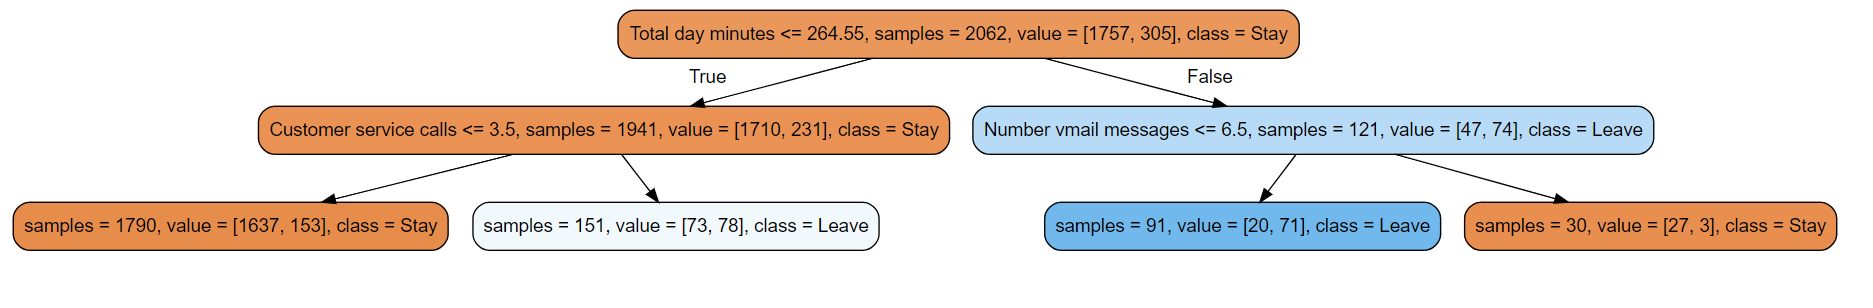

#### c. List the top 5 most important features in order.

In [13]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]



In [14]:
# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
4,Total day minutes,0.43211
16,Customer service calls,0.404648
3,Number vmail messages,0.163242
10,Total night minutes,0.0
15,Total intl charge,0.0


### Task 2: Ensemble Method Implementation (30%)

The goal of this task is to implement a **bagging and a boosting model** . Evaluate their performance on your dataset, providing insights into the differences in their error metrics, and discuss why one might outperform the other in this context.

In [15]:
# Suggested steps:
# 1) Split the data into training and testing sets, ensuring to respect the time series nature if applicable.
# 2) Implement a Bagging Regressor and a Gradient Boosting Regressor.
# 3) Evaluate both models using appropriate metrics for your problem.
# 4) Provide a comparative analysis of their performances.

The **AAPL, V, and GOOG datasets** consists of stock quotes companies, where the "Adj Close" price serves as the target variable, reflecting the adjusted closing price of Apple's stock over a specific period.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Below are several first steps of data processing. Make sure that you understand and follow those steps.

In [17]:
import pandas as pd
import os

file_names = ['AAPL.csv', 'V.csv', 'GOOG.csv']

# Function to load a CSV, transform the 'Dt' column, and set it as the index
def load_and_transform(file_path):
    df = pd.read_csv(file_path)
    df['Dt'] = pd.to_datetime(df['Dt'])
    df.set_index('Dt', inplace=True)
    return df

# Load all dataframes with the date transformations
dataframes = {name.split('.')[0]: load_and_transform(name) for name in file_names}

# Perform a series of left joins to combine the dataframes on their index
df = dataframes['AAPL']
for df_name in ['V', 'GOOG']:
    df = df.join(dataframes[df_name], how='left', lsuffix='_AAPL', rsuffix=f'_{df_name}')

df.head()

,Adj Close_AAPL,Close_AAPL,Div_AAPL,Factor_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,Adj Close_V,Close_V,...,Open_V,Volume_V,Adj Close,Close,Div,Factor,High,Low,Open,Volume
Dt,,,,,,,,,,,,,,,,,,,,,
2017-01-03,110.9539,116.15,0.0,1.0,116.330,114.76,115.8000,28781900.0,78.0492,79.50,...,78.76,13785200.0,786.14,786.14,0.0,1.0,789.630,775.800,778.81,1657300.0
2017-01-04,110.8297,116.02,0.0,1.0,116.510,115.75,115.8500,21118100.0,78.6874,80.15,...,79.44,8033100.0,786.90,786.90,0.0,1.0,791.340,783.160,788.36,1073000.0
2017-01-05,111.3933,116.61,0.0,1.0,116.864,115.81,115.9200,22193600.0,79.6102,81.09,...,80.34,7805100.0,794.02,794.02,0.0,1.0,794.480,785.020,786.08,1335200.0
2017-01-06,112.6351,117.91,0.0,1.0,118.160,116.47,116.7789,31751900.0,80.7098,82.21,...,81.30,8898300.0,806.15,806.15,0.0,1.0,807.900,792.204,795.26,1640200.0
2017-01-09,113.6668,118.99,0.0,1.0,119.430,117.94,117.9500,33561900.0,80.2582,81.75,...,82.28,7305300.0,806.65,806.65,0.0,1.0,809.966,802.830,806.40,1274600.0


In [18]:
# Assuming 'df' is your DataFrame and 'Adj Close_AAPL' is the target variable
X = df.drop('Adj Close_AAPL', axis=1)
y = df['Adj Close_AAPL']

# fill NA
X = X.fillna(0)

# Data Splitting, considering its temporal nature
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#### a. Train and test Bagging Model.

In [68]:
bagging_regressor = BaggingRegressor(n_estimators=10, random_state=42)
bagging_regressor.fit(X_train, y_train)
y_pred_bagging = bagging_regressor.predict(X_test)

In [69]:
bagging_model = BaggingRegressor(n_estimators=10, random_state=999)

bagging_model.fit(X_train, y_train)

y_pred_train = bagging_model.predict(X_train)
y_pred_test = bagging_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Bagging Model MSE on training data: {mse_train}")
print(f"Bagging Model MSE on test data: {mse_test}")

Bagging Model MSE on training data: 0.01853908333333333
Bagging Model MSE on test data: 0.06324583333333333


In [70]:
bagging_model = BaggingRegressor(n_estimators=10, random_state=42)

bagging_model.fit(X_train, y_train)

y_pred_train = bagging_model.predict(X_train)
y_pred_test = bagging_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Bagging Model MSE on training data: {mse_train}")
print(f"Bagging Model MSE on test data: {mse_test}")

Bagging Model MSE on training data: 0.02185651927437642
Bagging Model MSE on test data: 0.062194444444444434


#### b. Train and test Boosting Model.

In [20]:
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting_regressor.fit(X_train, y_train)
y_pred_gb = gradient_boosting_regressor.predict(X_test)

#### c. Evaluate the model and report (use Mean squared error; Mean absolute error; and R2).  

In [21]:
# Model Evaluation using more metrics

# your code here:
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

mse_boosting = mean_squared_error(y_test, y_pred_gb)
mae_boosting = mean_absolute_error(y_test, y_pred_gb)
r2_boosting = r2_score(y_test, y_pred_gb)


# Printing out the performance metrics with explanations
print('Bagging mean square error:',mse_bagging,'men absolute error:',mae_bagging,'R square:',r2_bagging)
print('Boosting mean square error:',mse_boosting,'men absolute error:',mae_boosting,'R square:',r2_boosting)

Bagging mean square error: 30.489071058484825 men absolute error: 3.4033037288135586 R square: 0.9016749589307375
Boosting mean square error: 27.01179885424367 men absolute error: 3.0949963863230825 R square: 0.9128889093864654


#### d. Hyperparameter Tuning and Model Optimization.  

In [22]:
# Possible steps:
# 1) Choose an ensemble model for hyperparameter tuning (one with the best performance in a previous step).
# 2) Define a parameter grid to explore.
# 3) Use GridSearchCV to find the optimal parameters.
# 4) Retrain the model using the best parameters and evaluate its performance.

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
# 1. Choose the model you wish to tune

gradient_boosting_regressor = GradientBoostingRegressor(random_state=42)


# 2. Define a comprehensive grid of parameters to search

param_grid = {
    'n_estimators': [50,100,200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': range(1,10),
    'min_samples_split': range(2,10),
}


# 3. Perform grid search and identify the best parameters

grid_search = GridSearchCV(estimator=gradient_boosting_regressor,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='neg_mean_squared_error',  # MSE as the scoring metric
                           verbose=1,  # Show progress
                           n_jobs=-1)  # Use all available cores
grid_search.fit(X_train, y_train)


# 4. Get the best parameters from the grid search

best_params = grid_search.best_params_

# 5. Retrain the model with the best parameters and evaluate its performance

best_gradient_boosting_regressor = GradientBoostingRegressor(**best_params, random_state=42)
best_gradient_boosting_regressor.fit(X_train, y_train)
y_pred_best_gb = best_gradient_boosting_regressor.predict(X_test)


# 6. Output the performance metrics
best_mse = mean_squared_error(y_test, y_pred_best_gb)
best_mae = mean_absolute_error(y_test, y_pred_best_gb)
best_r2 = r2_score(y_test, y_pred_best_gb)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


In [25]:
print(best_params, best_mse, best_mae, best_r2)

{'learning_rate': 0.2, 'max_depth': 8, 'min_samples_split': 9, 'n_estimators': 200} 26.173500536971236 3.154637948693338 0.9155923606105448


#### e. Conceptual Questions
- Describe the trade-offs between bias and variance when using ensemble methods.
- How does increasing the diversity of models in an ensemble affect its performance?
- Discuss the implications of temporal dependencies in time series data on the choice and performance of ensemble methods.

1. Choose the Gradient Boosting Regressor for several reasons:
- It demonstrates higher accuracy with lower MSE and MAE, meaning its predictions are generally closer to the actual values.
- It has a higher R² score, indicating a better fit to the data and a greater proportion of the variance explained by the model.

2. 
- Different models may overfit on different parts of the training data. By combining these models, an ensemble can reduce the overfitting
- Diversity in an ensemble allows it to capture a wider range of data patterns and relationships than any single model within the ensemble. This can lead to improved prediction accuracy.
- Sometimes the ensemble includes models that are strong in areas where others are weak, which could also lead to higher accuracy.


3. 
-  Models that can capture temporal dynamics (e.g., ARIMA, LSTM networks) might be more appropriate as members of the ensemble for time series forecasting.
-  Time series data can exhibit changes in patterns over time. An ensemble that includes models capable of adapting to such changes may perform better.
-  The performance of ensemble methods on time series data must be evaluated using techniques that respect the temporal ordering of the data, such as time series cross-validation

## Part B - Support Vector Machines (40%)

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

### Task 1: SVM Decision Boundaries and C Parameter Investigation (20%)

**The Iris dataset** is a classic in the field of machine learning and statistics, introduced by the British statistician and biologist Ronald Fisher in 1936. The dataset consists of 150 samples from three species of Iris flowers: Iris setosa, Iris versicolor, and Iris virginica. Each sample is described by four features: the length and the width of the sepals and petals, in centimeters. See [wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set).

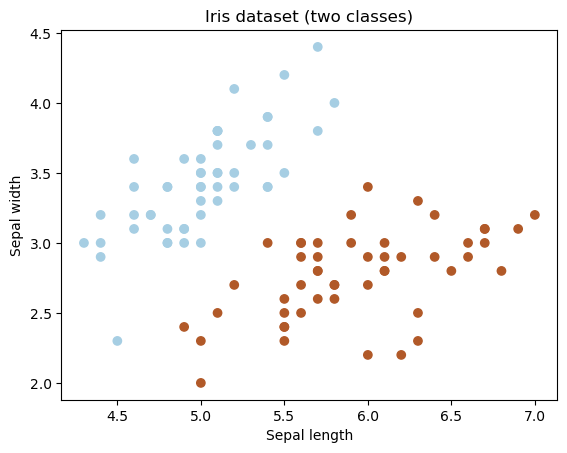

In [27]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization
y = iris.target

# In the first task, we will consider only 2 classes for binary classification
X = X[y != 2]
y = y[y != 2]

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset (two classes)')
plt.show()

#### a. Consider the dataset above. Based on the visual inspection of the plot provided, how would you train an SVM model for this dataset? Explain your choice of kernel and parameters.

- I will train the model using linear kerneal since it is obviously that we can perfectly seperate these two clusters with a line.
- I will use a large C, since there exist points close to anoter clusters so I want a smaller margin and less misclassification.

**Assuming you chose to train a linear SVM with C=100000; answer the following five questions:**

#### b. Report the separating hyperplane.

In [28]:
clf = SVC(kernel='linear',C=100000)  
clf.fit(X, y)

SVC(C=100000, kernel='linear')

In [29]:
w = clf.coef_[0]
a = -w[0] / w[1]
print('The separating hyperplane is the line: y = {a}x - {b}'.format(a=a, b=(clf.intercept_[0]) / w[1]))

The separating hyperplane is the line: y = 1.2000004017679664x - 3.2900023254701303


#### c. List the support vectors.

In [30]:
print(clf.support_vectors_)

[[5.5 3.5]
 [4.5 2.3]
 [4.9 2.4]
 [5.4 3. ]]


#### d. Calculate the upper and lower hyperplanes (lines) of the margin

In [31]:
b = clf.support_vectors_[0]
print('The lower separating hyperplane is the line: y = {a}x - {b}'.format(a = a, b = abs(b[1] - a * b[0])))
b = clf.support_vectors_[-1]
print('The upper separating hyperplane is the line: y = {a}x + {b}'.format(a = a, b = (b[1] - a * b[0])))

The lower separating hyperplane is the line: y = 1.2000004017679664x - 3.100002209723815
The upper separating hyperplane is the line: y = 1.2000004017679664x + -3.480002169547019


#### e. Compute the width of the margin

In [32]:
margin_width = 2 / np.linalg.norm(w)

print(f'The width of the margin is: {margin_width}')

The width of the margin is: 0.24319362349362694


#### f. Using the provided SVM model with a high value of C (e.g., C=100000), plot the decision boundaries and margins. Then, adjust the SVM model by setting a very small value for the constant C (e.g., C=0.01). How do you expect this change to affect the margin width? Plot the new decision boundaries and margins and compare them to the previous plot to validate your expectations. Interpret the results

In [33]:
# Suggested steps:
# 1) Train a linear SVM with a large C value (optional if you already did)
# 2) Plot the decision boundaries and margins
# 3) Now train another linear SVM with a small C value
# 4) Plot the new decision boundaries and margins

In [34]:
# Train a linear SVM with a large C value (optional since we already did)
clf = SVC(kernel='linear',C=100000)  
clf.fit(X, y)


SVC(C=100000, kernel='linear')

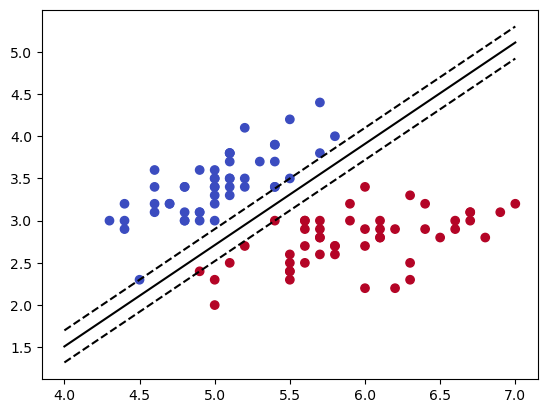

In [35]:
w = clf.coef_[0]
a = -w[0] / w[1]

x1 = np.linspace(4, 7)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

b = clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])

b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])

plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap('coolwarm', 2))

plt.axis('tight')
plt.show()

In [36]:
# Now train another linear SVM with a small C value
clf = SVC(kernel='linear',C=0.01)  
clf.fit(X, y)

SVC(C=0.01, kernel='linear')

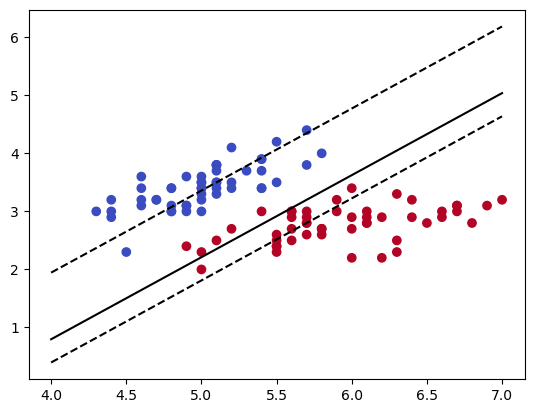

In [37]:
w = clf.coef_[0]
a = -w[0] / w[1]

x1 = np.linspace(4, 7)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

b = clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])

b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])

plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.axis('tight')
plt.show()

### Task 2: Training using SVM (20%)

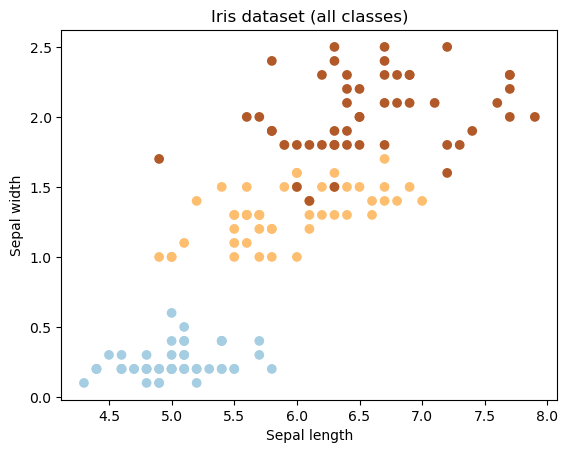

In [38]:
# Load Iris dataset
iris = load_iris(as_frame=True)
df = iris.frame
X = df[['sepal length (cm)','petal width (cm)']].values  # Select the first two features for visualization purposes
y = df.target

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset (all classes)')
plt.show()

#### a. Train a linear SVM and a non-linear SVM with RBF kernel using the training set. Use the default arguments, make predictions and calculate accuracy on test set.

In [39]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [40]:
# Standardize the data
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [41]:
# Train a linear SVM

linear_svc = SVC(kernel='linear')  
linear_svc.fit(X_train_scaled,y_train)

SVC(kernel='linear')

In [42]:
# Train a non-linear SVM with RBF kernel

rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train_scaled,y_train)

SVC()

In [43]:
# Make predictions and calculate accuracy on test out-of-sample set
print("Out of sample, we successfully predict {} percent of the data by linear SVM".format((y_test==linear_svc.predict(X_test_scaled)).sum()*100/len(y_test)))
print("Out of sample, we successfully predict {} percent of the data by non-linear SVM".format((y_test==rbf_svc.predict(X_test_scaled)).sum()*100/len(y_test)))

Out of sample, we successfully predict 94.0 percent of the data by linear SVM
Out of sample, we successfully predict 96.0 percent of the data by non-linear SVM


In [44]:
# Plot decision boundaries

def plot_decision_boundary(clf, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)

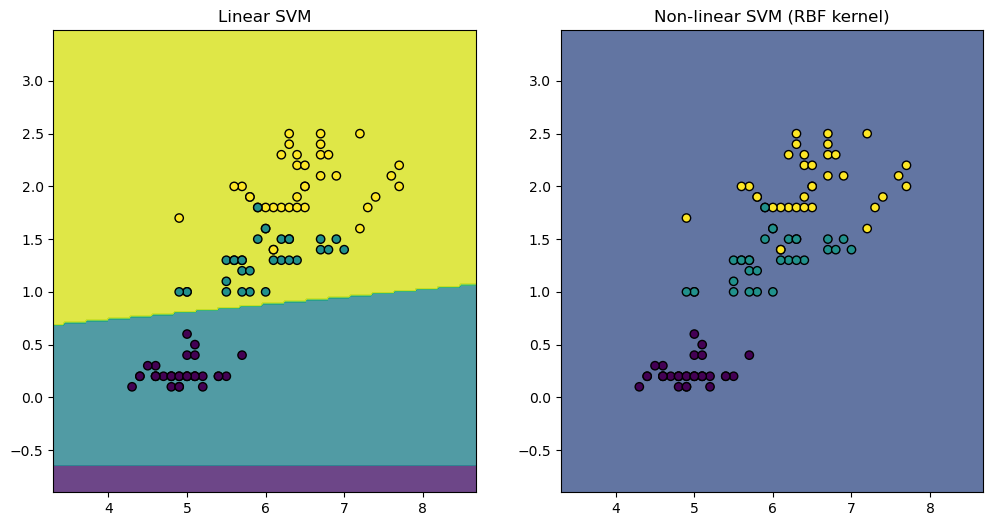

In [45]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(linear_svc, X_train, y_train, "Linear SVM")
plt.subplot(1, 2, 2)
plot_decision_boundary(rbf_svc, X_train, y_train, "Non-linear SVM (RBF kernel)")
plt.show()

#### b. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [48]:
# Train your model.

poly_svc = SVC(kernel='poly')
poly_svc.fit(X_train,y_train)


# Report IS and OS results.
print("In sample, we successfully predict {} percent of the data".format((y_train==poly_svc.predict(X_train)).sum()*100/len(y_train)))
print("Out of sample, we successfully predict {} percent of the data".format((y_test==poly_svc.predict(X_test)).sum()*100/len(y_test)))

In sample, we successfully predict 94.0 percent of the data
Out of sample, we successfully predict 94.0 percent of the data


#### c. Try polynomials of degree 1,2,3,4,5. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below. Plot the graph of "Accuracy vs log(C)" for each degree.

In [49]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset.
# Denote the remaining training data by (X_train_1, Y_train_1).

X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, y_train, test_size=0.33, random_state=1)

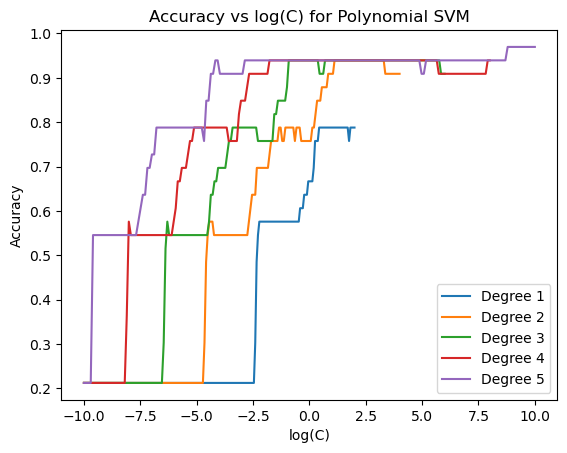

In [50]:
from math import exp
from sklearn.metrics import accuracy_score
for degree in [1, 2, 3, 4, 5]:
    C_values = [exp(i) for i in np.linspace(-10, 2*degree, 200)]
    accuracies = []

    for C in C_values:
        # Train the SVM model
        clf = SVC(kernel='poly', degree=degree, C=C)
        clf.fit(X_train_1, Y_train_1)

        # Predict the labels on validation dataset
        Y_pred = clf.predict(X_vali)

        # Calculate accuracy
        accuracy = accuracy_score(Y_vali, Y_pred)
        accuracies.append(accuracy)
    
    # Plotting the accuracy vs log(C)
    plt.plot(np.log(C_values), accuracies, label=f'Degree {degree}')

plt.xlabel('log(C)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs log(C) for Polynomial SVM')
plt.legend()
plt.show()

#### d.  Choose the optimal degree and the optimal regularization constant C based on these graphs. Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected.

In [51]:
poly_svc = SVC(kernel='poly', degree=2, C=exp(2.5))
poly_svc.fit(X_train, Y_train)

SVC(C=12.182493960703473, degree=2, kernel='poly')

In [52]:
#Report out-of-sample result
print("In sample, we successfully predict {} percent of the data".format((Y_train==clf.predict(X_train)).sum()*100/len(Y_train)))
print("Out of sample, we successfully predict {} percent of the data".format((Y_test==clf.predict(X_test)).sum()*100/len(Y_test)))

In sample, we successfully predict 96.0 percent of the data
Out of sample, we successfully predict 94.0 percent of the data


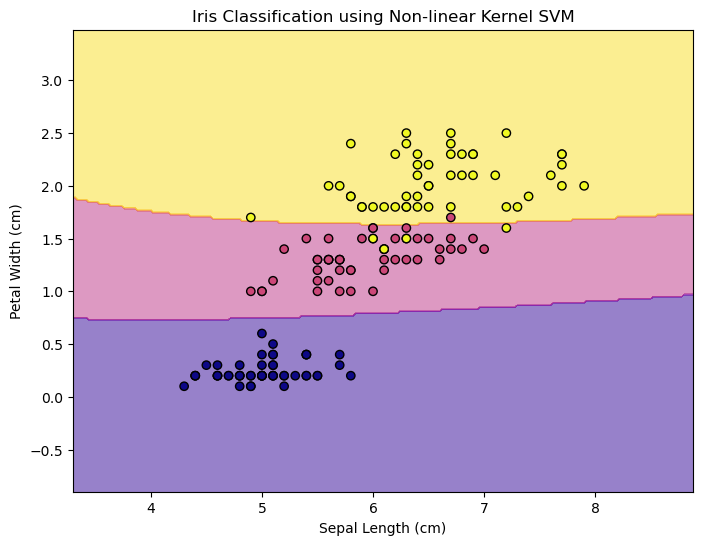

In [53]:
# Plot decision boundary for polynomial SVM using the function (example code below)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='plasma')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='plasma')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Classification using Non-linear Kernel SVM')
plt.show()

## Part C - Hierarchical and K-Means Clustering (30%)

For hierarchical and K-Means clustering, use the **Mall Customer Segmentation Data** from Kaggle. For leader clustering, simulate streaming data or use a large dataset divided into chunks to mimic streaming data, such as transaction data or sensor data streams.

In [54]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')

In [55]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [56]:
# Start from selecting relevant features for clustering: 
# We will be working with two features: 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Task 1:  Implement K-Means algorithm (10%)

In [58]:
# Implement K-Means
from sklearn.cluster import KMeans
km = KMeans(random_state=999,n_clusters=2)
res=km.fit(X)

In [59]:
# Check the best number of cluster with any method you like (simple Elbow method is good):
# reference from IADS Lab 8
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

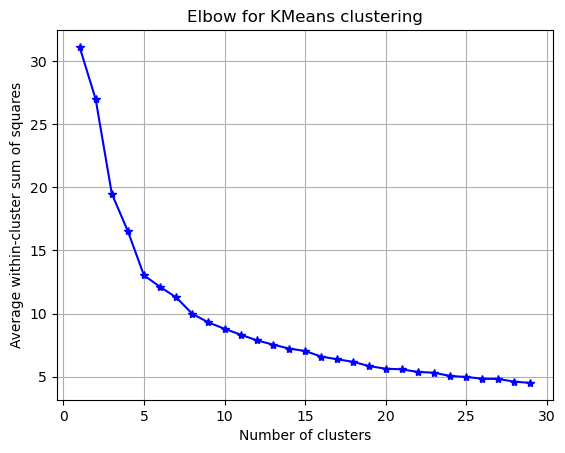

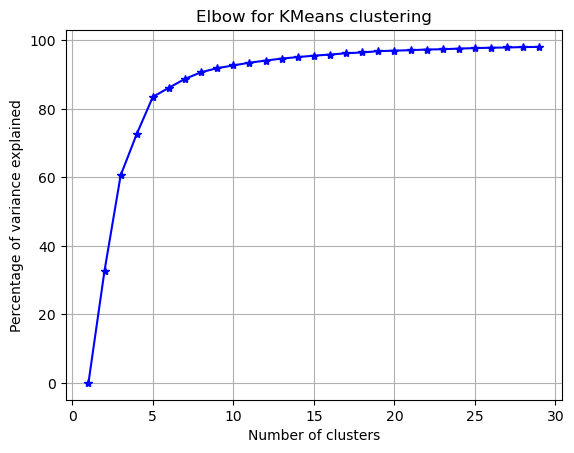

In [60]:
elbow(X, range(1,30))

# According to Elbow method, chose 5

In [61]:
km = KMeans(random_state=999,n_clusters=5)
res=km.fit(X)

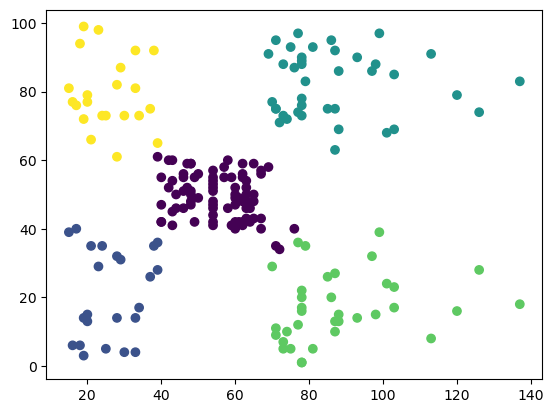

In [62]:
# Plotting clusters
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=res.labels_, cmap='viridis')

### Task 2:  Implement a Hierarchical Clustering algorithm (10%)

In [63]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

In [64]:
# For Hierarchical Clustering, you can perform Agglomerative Clustering

clustering = AgglomerativeClustering(n_clusters=5)
y_hc = clustering.fit_predict(X)

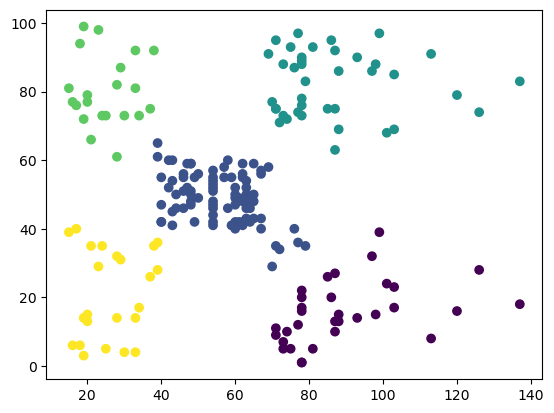

In [65]:
# Plot the clusters (for 2D data)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y_hc, cmap='viridis')

### Task 3: Evaluate and report clustering quality using silhouette scores (10%).

Silhouette score is a tool for assessing the appropriateness of clustering results by providing a quantitative measure of how well-defined and distinct the clusters are. The Silhouette Score quantifies how well a data point fits into its assigned cluster and how distinct it is from other clusters. 

In [66]:
from sklearn.metrics import silhouette_score

# For K-Means
silhouette_avg = silhouette_score(X, res.labels_)
print("For K-means, the average silhouette_score is : {}".format(silhouette_avg))

# For Hierarchical Model
silhouette_avg = silhouette_score(X, y_hc)
print("For Hierarchical Model, the average silhouette_score is : {}".format(silhouette_avg))

For K-means, the average silhouette_score is : 0.553931997444648
For Hierarchical Model, the average silhouette_score is : 0.5529945955148897


#### Discuss which method works the best for this dataset. Elaborate if those methods are good fit for this data.

- Both methods have produced a moderate silhouette score, suggesting that the clusters neither have a clear-cut distinction nor are too ambiguous. In this case, both methods appear to be a relatively good fit for the data with similar performance.
- Interpretability: Hierarchical clustering gives you a dendrogram which can be very informative and allows you to choose the level of clustering that is most meaningful. This is not something that K-Means directly offers.
- Cluster Shapes: K-Means assumes spherical clusters and is best when clusters are distinct and well-separated. Hierarchical clustering doesn’t have this assumption and can sometimes capture more complex cluster shapes.

## According to the reasons above, the hierarchical clustering works the bese